<div style="display: inline-block;">
    <img src="images/nhsa_logo.png" alt="Image" style="text-align: left;">
</div>

# Parent Gauge Data Analysis Project
---
## Exploratory Data Analysis

Here, we conduct an exploratory data analysis.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to calculate cronbach's alpha
import pingouin as pg

In [42]:
#read the .csv file into dataframe
df = pd.read_csv('../data/intv_data.csv')

/var/folders/vw/1sthm_ts1dj_1hqg1xnsz19w0000gn/T/ipykernel_9057/832574344.py:2: DtypeWarning: Columns (91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/intv_data.csv')


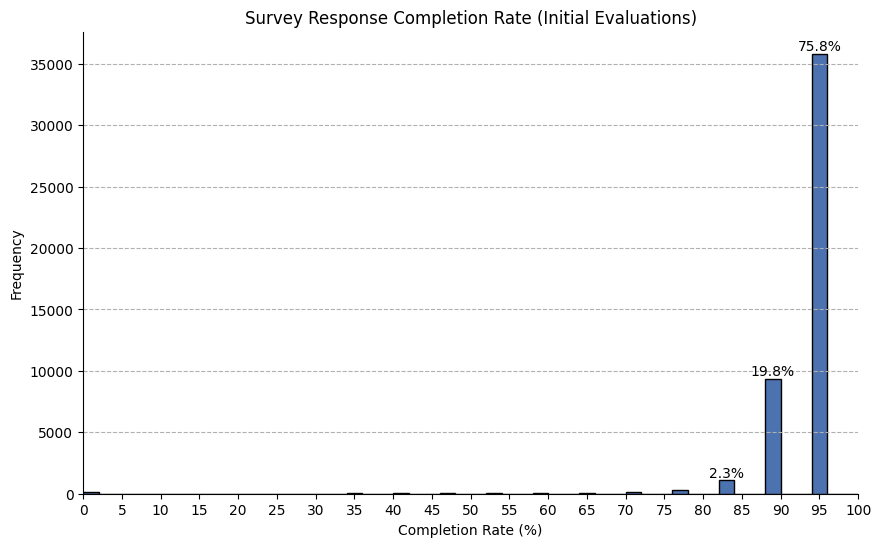

In [12]:
# Get the list of variable questions
# NOTE: consider removing Q10 and Q11 out of likert sum for initial
variable_questions_initial = ['Q2', 'Q3', 'Q4', 'Q5',
                      'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18']

# Filter DataFrame for 'Initial' evaluations
filtered_df = df[df['evaluation'] == 'Initial']

# Calculate the completion rate for each survey response
completion_rates = (filtered_df[variable_questions_initial].apply(lambda x: x.notnull().sum(), axis=1) / len(variable_questions_initial)) * 100

# Create a histogram of completion rates with detailed x-axis
bin_width = 2  # Adjust the bin width as desired
bins = np.arange(0, 101, bin_width)
plt.figure(figsize=(10, 6))
plt.hist(completion_rates, bins=bins, edgecolor='black', color='#4c72b0')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Frequency')
plt.title('Survey Response Completion Rate (Initial Evaluations)')
plt.xticks(np.arange(0, 101, 5))
plt.xlim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Calculate the total count of each bin
counts, _ = np.histogram(completion_rates, bins=bins)

# Get the indices of the three tallest bars
tallest_indices = np.argsort(counts)[-3:]

# Add frequency percentage above each bar for the three tallest bars
for i, rect in enumerate(plt.gca().patches):
    height = rect.get_height()
    if i in tallest_indices:
        percentage = (height / len(completion_rates)) * 100
        plt.gca().annotate(f'{percentage:.1f}%', (rect.get_x() + rect.get_width() / 2, height + 1),
                           ha='center', va='bottom')

plt.show()

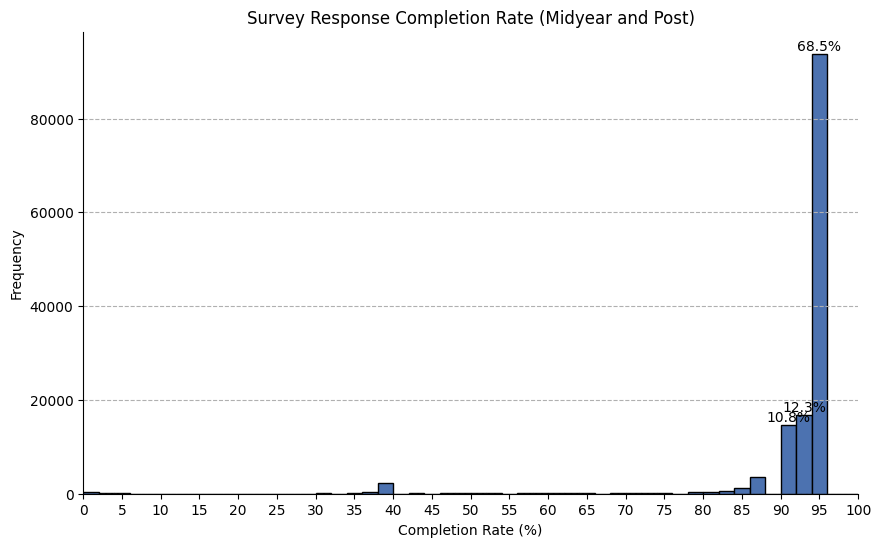

In [13]:
# Get the list of variable questions
# NOTE: consider removing Q10 to Q11 for calculating likert sum
variable_questions_midpost = ['Q2', 'Q2a', 'Q3', 'Q3a', 'Q4', 'Q4a', 'Q5', 'Q5a',
                      'Q6', 'Q6a', 'Q7', 'Q7a', 'Q8', 'Q8a', 'Q9', 'Q9a',
                      'Q10', 'Q10a', 'Q11', 'Q11a', 'Q12', 'Q12a', 'Q13', 'Q13a',
                      'Q14', 'Q14a', 'Q15', 'Q15a', 'Q16', 'Q16a', 'Q17', 'Q17a',
                      'Q18', 'Q18a', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25']

# Filter DataFrame for 'midyear' and 'post' evaluations
filtered_df = df[df['evaluation'].isin(['Midyear', 'Post'])]

# Calculate the completion rate for each survey response
completion_rates = (filtered_df[variable_questions_midpost].apply(lambda x: x.notnull().sum(), axis=1) / len(variable_questions_midpost)) * 100

# Create a histogram of completion rates with detailed x-axis
bin_width = 2  # Adjust the bin width as desired
bins = np.arange(0, 101, bin_width)
plt.figure(figsize=(10, 6))
plt.hist(completion_rates, bins=bins, edgecolor='black', color='#4c72b0')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Frequency')
plt.title('Survey Response Completion Rate (Midyear and Post)')
plt.xticks(np.arange(0, 101, 5))
plt.xlim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Calculate the total count of each bin
counts, _ = np.histogram(completion_rates, bins=bins)

# Get the indices of the three tallest bars
tallest_indices = np.argsort(counts)[-3:]

# Add frequency percentage above each bar
for i, rect in enumerate(plt.gca().patches):
    height = rect.get_height()
    if i in tallest_indices:
        percentage = (height / len(completion_rates)) * 100
        plt.gca().annotate(f'{percentage:.1f}%', (rect.get_x() + rect.get_width() / 2, height + 1),
                           ha='center', va='bottom')

plt.show()

In [14]:
# Filter DataFrame for 'midyear' and 'post' evaluations
filtered_df = df[df['evaluation'].isin(['Initial'])]

# Calculate the percentage of missing values for each variable
missing_percentages = (filtered_df[variable_questions_initial].isnull().mean() * 100).round(2)

print(missing_percentages)

Q2      0.74
Q3      0.86
Q4      1.54
Q5      1.68
Q6      1.68
Q7      1.61
Q8      1.31
Q9      1.19
Q10    31.65
Q11    85.01
Q12     1.76
Q13     1.56
Q14     1.60
Q15     1.39
Q16     1.94
Q17     1.70
Q18     1.79
dtype: float64


In [6]:
# Filter DataFrame for 'midyear' and 'post' evaluations
filtered_df = df[df['evaluation'].isin(['Midyear', 'Post'])]

# Calculate the percentage of missing values for each variable
missing_percentages = (filtered_df[variable_questions_midpost].isnull().mean() * 100).round(2)

print(missing_percentages)

Q2       0.80
Q2a      3.22
Q3       1.22
Q3a      3.57
Q4       1.72
Q4a      3.98
Q5       1.56
Q5a      3.76
Q6       1.64
Q6a      3.81
Q7       1.73
Q7a      3.82
Q8       1.51
Q8a      3.79
Q9       1.20
Q9a      3.57
Q10     27.36
Q10a    29.06
Q11     83.92
Q11a    84.32
Q12      1.94
Q12a     4.23
Q13      1.67
Q13a     4.02
Q14      1.52
Q14a     3.99
Q15      1.44
Q15a     3.90
Q16      2.00
Q16a     4.48
Q17      2.17
Q17a     7.47
Q18      1.86
Q18a     4.30
Q19      3.57
Q20      3.71
Q21      3.93
Q22      4.26
Q23      4.57
Q24      4.81
Q25      4.08
dtype: float64


# Score averages by question and evaluation

In [15]:
#score averages by variable and evaluation
# Filter columns starting with 'Q'
q_columns = [col for col in df.columns if col.startswith('Q')]

# Group by 'Evaluation' and calculate mean for the filtered columns
grouped = df.groupby('evaluation')[q_columns].mean().reset_index()

# Pivot the table
pivot_table = grouped.pivot_table(index='evaluation', values=q_columns).T.reset_index()
pivot_table.columns = ['variable', 'initial_average', 'mid_average', 'post_average']

# Sort the table by the desired columns in descending order
pivot_table = pivot_table.sort_values(by=['initial_average', 'mid_average', 'post_average'], ascending=[False, False, False])

print(pivot_table)

   variable  initial_average  mid_average  post_average
25      Q20         4.881671     4.875226      4.892054
19      Q19         4.876993     4.863578      4.884033
11      Q15         4.841429     4.851419      4.869943
21      Q1b         4.763636     4.605483      4.681140
2      Q10a         4.756219     4.671951      4.737539
23      Q1d         4.750000     4.680572      4.733333
26      Q21         4.730415     4.735437      4.792878
15      Q17         4.666143     4.725120      4.757515
1       Q10         4.644657     4.620861      4.652247
0        Q1         4.635980     4.697281      4.737129
12     Q15a         4.618182     4.478443      4.615036
13      Q16         4.615833     4.664507      4.716550
14     Q16a         4.602941     4.507506      4.628254
32       Q3         4.585169     4.685887      4.716508
45      Q9a         4.570397     4.424106      4.556091
17      Q18         4.568853     4.615893      4.664828
27      Q22         4.566745     4.537680      4

## WEAKEST QUESTIONS

In [16]:
## QUESTIONS WITH WEAKEST RESPONSES
# Filter columns starting with 'Q'
q_columns = [col for col in df.columns if col.startswith('Q')]

# Function to calculate the proportion of responses that are either scored 1 or 2
def calculate_proportion(series):
    return round((((series == 1) | (series == 2)).sum() / series.notna().sum()) * 100, 2)

# Group by 'Evaluation' and apply the custom function
grouped = df.groupby('evaluation')[q_columns].apply(lambda x: x.apply(calculate_proportion)).reset_index()

# Pivot the table
pivot_table = grouped.pivot_table(index='evaluation', values=q_columns).T.reset_index()
pivot_table.columns = ['variable', 'initial_proportion', 'mid_proportion', 'post_proportion']

# Sort the table by the desired columns in descending order
pivot_table = pivot_table.sort_values(by=['initial_proportion', 'mid_proportion', 'post_proportion'], ascending=[False, False, False])

print(pivot_table)

   variable  initial_proportion  mid_proportion  post_proportion
35      Q4a               21.55           23.51            17.22
7       Q13               19.72           19.74            16.55
28      Q23               16.28           18.26            15.65
29      Q24               12.09           14.43            11.08
18     Q18a               10.66           12.51             8.75
10     Q14a                9.85           13.58             9.68
8      Q13a                7.58           11.14             8.64
47     QD1a                6.67            5.01             3.73
44       Q9                6.49            4.53             3.57
49     QD2a                6.25            3.78             3.18
20      Q1a                6.00            5.62             4.28
34       Q4                4.87            3.69             2.68
4      Q11a                4.65            3.85             3.29
14     Q16a                4.41            5.65             3.77
12     Q15a              

## Cronbach's Alpha

Used to determine the interrelatedness of survey questions. A number closer to 1 indicates high interrelatedness. Here, we have an alpha of 0.87, indicating a good score. 

In [17]:
# run alpha on likert sum
# Calculate Cronbach's alpha
alpha = pg.cronbach_alpha(df[variable_questions_initial])
print("Cronbach's alpha:", alpha)

Cronbach's alpha: (0.8715171341842293, array([0.871, 0.872]))


In [ ]:
## Likert Scale Analysis

see R script [likert_analysis.ipynb](likert_analysis.ipynb) for analysis of Parent Gauge survey questions

## Standard Deviation Analysis

The standard deviation of a Likert question provides information about the variability or dispersion of responses to that question. It quantifies how much individual responses deviate from the average or central tendency of the Likert scale.

A higher standard deviation suggests a greater dispersion or variability in the responses, indicating that respondents have diverse opinions or attitudes towards the question. This indicates a lack of consensus or agreement among the respondents.

Conversely, a lower standard deviation indicates less variability in the responses, suggesting a higher level of consensus or agreement among the respondents. In this case, the majority of respondents tend to have similar opinions or attitudes towards the question.

In [24]:
# code for it

# Filter columns starting with 'Q'
q_columns = [col for col in df.columns if col.startswith('Q')]

# Calculate the standard deviation for each variable
std_devs = df[q_columns].std().round(2)

# Sort the Series in descending order
std_devs = std_devs.sort_values(ascending=False)

# Display the resulting Series
print(std_devs)

Q4a     1.37
Q23     1.26
Q24     1.24
Q13     1.21
Q14a    1.21
Q18a    1.19
Q13a    1.10
Q8a     0.95
Q6a     0.94
Q15a    0.94
Q7a     0.94
Q1a     0.93
Q2a     0.92
QD1a    0.92
Q9      0.92
Q16a    0.91
Q5a     0.90
Q4      0.88
Q1c     0.87
Q11     0.86
Q17a    0.86
Q12a    0.85
QD2a    0.85
Q7      0.84
Q11a    0.82
Q9a     0.81
Q6      0.81
Q5      0.79
Q2      0.78
Q22     0.77
QD1     0.76
QD2     0.74
Q16     0.73
Q14     0.72
Q25     0.71
Q3a     0.70
Q12     0.68
Q10a    0.67
Q1b     0.67
Q8      0.67
Q1      0.63
Q10     0.62
Q18     0.62
Q3      0.61
Q1d     0.61
Q17     0.59
Q21     0.54
Q15     0.41
Q19     0.38
Q20     0.37
dtype: float64


# Likert Sum Initial and Post Analysis

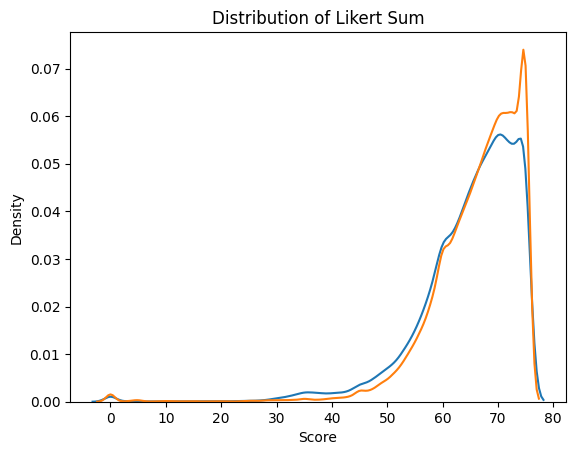

In [43]:
# Create KDE plots for 'likert_sum_initial' and 'likert_sum_mid_post_initial'
sns.kdeplot(data=df, x='likert_sum_initial', label='likert_sum_initial')
sns.kdeplot(data=df, x='likert_sum_mid_post_initial', label='likert_sum_mid_post_initial')

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution of Likert Sum')

# Display the plot
plt.show()

In [ ]:
# Create a swarm plot for 'likert_sum_initial' and 'likert_sum_mid_post_initial'
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df[['likert_sum_initial', 'likert_sum_mid_post_initial']], size=4)
plt.xlabel('Variable')
plt.ylabel('Likert Score')
plt.title('Swarm Plot of Likert Scores')
plt.show()

In [ ]:
# Calculate the ECDF for 'likert_sum_initial' and 'likert_sum_mid_post_initial'
x_initial = np.sort(df['likert_sum_initial'])
y_initial = np.arange(1, len(x_initial) + 1) / len(x_initial)

x_mid_post_initial = np.sort(df['likert_sum_mid_post_initial'])
y_mid_post_initial = np.arange(1, len(x_mid_post_initial) + 1) / len(x_mid_post_initial)

# Create the ECDF plot
plt.figure(figsize=(10, 6))
plt.plot(x_initial, y_initial, marker='.', linestyle='-', label='likert_sum_initial')
plt.plot(x_mid_post_initial, y_mid_post_initial, marker='.', linestyle='-', label='likert_sum_mid_post_initial')
plt.xlabel('Likert Score')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.legend()
plt.show()